In [1]:
import random
from src.core import Engine
from src.agents import ETFTrader, FundamentalTrader, TrendTrader, MeanReversionTrader, ZeroIntelligenceTrader

In [15]:
total_cash = 1_000_000
zi_share = 0.3642
tech_trend_share = 0.1686
tech_reversion_share = 0.0321
fundamental_share = 0.1715
etf_share = 0.03#0.2636

initial_price = 100

In [16]:
zi_cash, zi_stocks = 500, 0
zi_n_agents = round(total_cash * zi_share / zi_cash)
zi_agents = [
    ZeroIntelligenceTrader(
        cash=zi_cash, 
        stocks=zi_stocks, 
        noise=0.1,
    ) for i in range(zi_n_agents)
]

In [17]:
tech_trend_cash = total_cash * tech_trend_share
tech_trend_windows = [10, 15, 20, 25, 30, 40, 50]
tech_trend_agents = [
    TrendTrader(
        cash=tech_trend_cash * window / sum(tech_trend_windows), 
        stocks=0, 
        window_size=window,
        pct=0.5,
    ) for window in tech_trend_windows
]

In [18]:
tech_reversion_cash = total_cash * tech_reversion_share
tech_reversion_windows = [3, 5, 7, 9]
tech_reversion_agents = [
    MeanReversionTrader(
        cash=tech_reversion_cash * window / sum(tech_reversion_windows), 
        stocks=0, 
        window_size=window,
        pct=0.01,
    ) for window in tech_reversion_windows
]

In [19]:
fundamental_cash = total_cash * fundamental_share
fundamental_agents = [
    FundamentalTrader(
        cash=fundamental_cash,
        stocks=0,
        mu=0.000185,
        sigma=0.000199,
        pct=0.005,
        min=(1 - 0.06) ** (1 / 90) - 1,
        max=(1 + 0.06) ** (1 / 90) - 1,
    )
]

In [20]:
etf_agents = [
    ETFTrader(
        cash=total_cash * etf_share,
        stocks=0,
        pct=0.001,
    )
]

In [21]:
agents = (
    zi_agents
    # + tech_trend_agents
    + tech_reversion_agents
    # + fundamental_agents
    + etf_agents
)

eng = Engine()
eng.run(
    agents=agents,
    initial_price=initial_price,
    n_steps=10_000,
)

100%|████████████████████████████████████| 10000/10000 [00:58<00:00, 169.78it/s]


<Axes: >

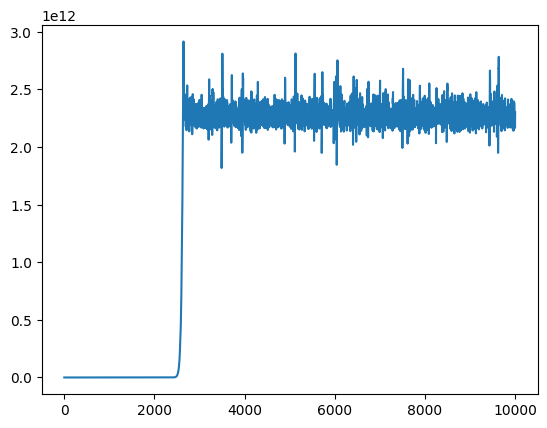

In [22]:
import pandas as pd
price = pd.Series(eng.prices)
price.plot()

<Axes: >

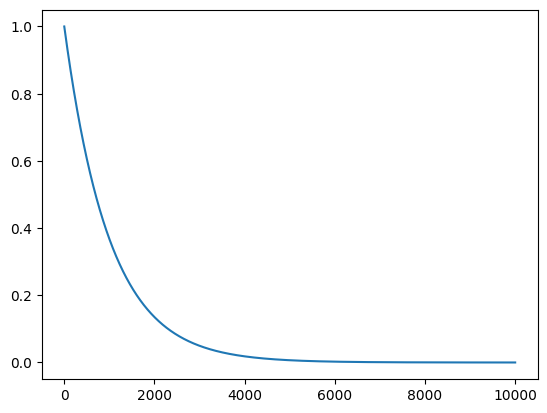

In [14]:
pd.Series([1] + [1 - 0.001] * 10_000).cumprod().plot()

In [98]:
fund = [b[FundamentalTrader]["total_equity"] for b in eng.stats_monitor.balance_stats]
trend = [b[TrendTrader]["total_equity"] for b in eng.stats_monitor.balance_stats]
rev = [b[MeanReversionTrader]["total_equity"] for b in eng.stats_monitor.balance_stats]

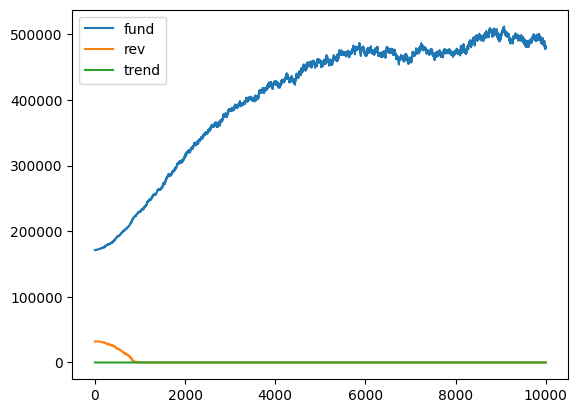

In [99]:
import matplotlib.pyplot as plt

pd.Series(fund).plot(label="fund")
pd.Series(rev).plot(label="rev")
pd.Series(trend).plot(label="trend")
plt.legend()

<Axes: >

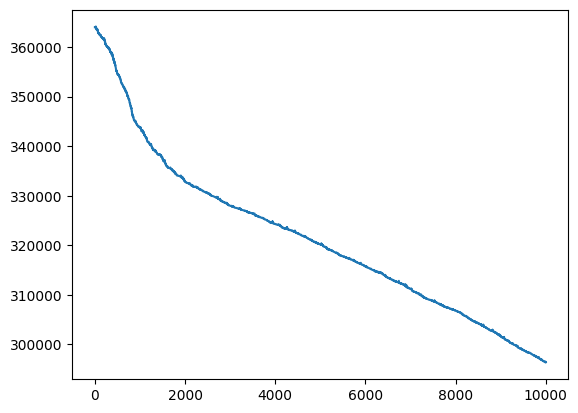

In [100]:
pd.Series([b[ZeroIntelligenceTrader]["total_equity"] for b in eng.stats_monitor.balance_stats]).plot()

In [26]:
pd.Series(r)[:85]

0     32100.000000
1     32100.000000
2     32100.000000
3     32100.235587
4     32098.992556
          ...     
80     5576.779737
81     3949.706523
82     1631.373871
83        0.000000
84        0.000000
Length: 85, dtype: float64

In [23]:
buys = [s[ZeroIntelligenceTrader]["mean_weighted_buy_order_price"] for s in eng.stats_monitor.supply_demand_stats]
sells = [s[ZeroIntelligenceTrader]["mean_weighted_sell_order_price"] for s in eng.stats_monitor.supply_demand_stats]

In [24]:
import pandas as pd
df = pd.DataFrame()
df["buys"] = buys
df["sells"] = sells

In [25]:
(df["buys"] - df["sells"]).describe()

count    1.000000e+04
mean    -2.113725e+01
std      8.803792e+02
min     -6.031606e+04
25%     -6.865959e-12
50%     -2.714395e-13
75%      6.180333e-12
max      4.538372e+03
dtype: float64

In [26]:
import pandas as pd
price = pd.Series([t[ZeroIntelligenceTrader]["mean_buy_transaction_price"] for t in eng.stats_monitor.trade_stats])

<Axes: >

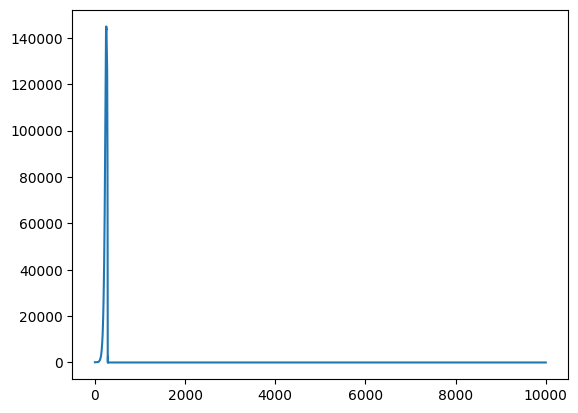

In [27]:
price.plot()